<a href="https://colab.research.google.com/github/M-Dogra/Python/blob/main/Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cluster Analysis**

Step 1: Load the Data
Let's first load and inspect the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('ShoppingVisits.csv')
print(df.head())

   visits   money
0    2.01   77.15
1    1.89  112.58
2    1.18   68.80
3    1.64  121.35
4    2.18   81.00


In [3]:
df

,visits,money
0,2.01,77.15
1,1.89,112.58
2,1.18,68.80
3,1.64,121.35
4,2.18,81.00
...,...,...
95,2.58,606.20
96,2.39,442.92
97,4.89,627.72
98,4.15,522.83


Data Description

visits : Average number of store visits per quarter

money : Average amount of spending per quarter

#Task 1: K-means Clustering and Scaling
1. Perform K-means clustering with 3 clusters on the original data without scaling the
variables. Set the number of random initial starts to be 20. Show the clustering output.

In [4]:
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
df['Cluster_Unscaled'] = kmeans.fit_predict(df[['visits', 'money']])

# Display cluster centers
print("Cluster Centers (Unscaled):")
print(kmeans.cluster_centers_)

Cluster Centers (Unscaled):
[[  3.29148148 566.23037037]
 [  2.28121212 121.32030303]
 [  3.22575    377.6745    ]]


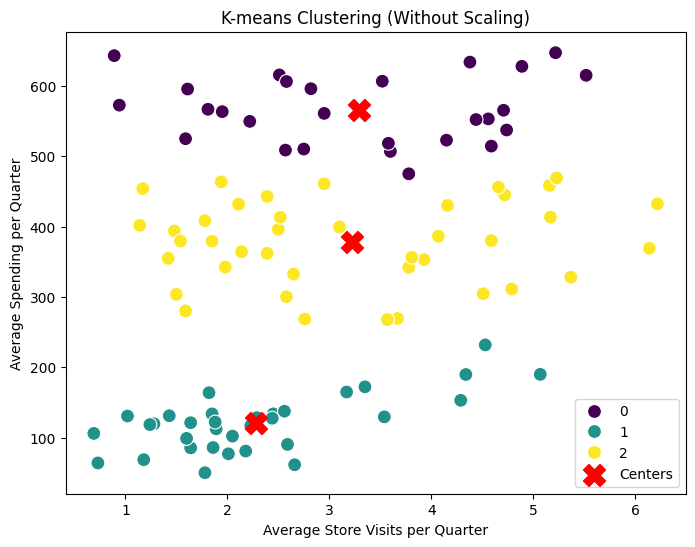

In [5]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['visits'], y=df['money'], hue=df['Cluster_Unscaled'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='red', marker='X', label='Centers')
plt.xlabel("Average Store Visits per Quarter")
plt.ylabel("Average Spending per Quarter")
plt.title("K-means Clustering (Without Scaling)")
plt.legend()
plt.show()

#Output Explanation
1. Cluster Assignments: Each shopper is assigned a cluster (0, 1, or 2).
2. Cluster Centers: The output shows the computed centroids for each cluster.
3. Scatter Plot:
* Different clusters are colored distinctly.
* Red X markers indicate cluster centers.

2. Scale the variables, and then perform K-means clustering with 3 clusters on the scaled data (with 20 random initial starts). Show the clustering output.

In [6]:
# Scale the Data
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale 'visits' and 'money' columns
df[['visits_scaled', 'money_scaled']] = scaler.fit_transform(df[['visits', 'money']])

# Display first few rows after scaling
print(df[['visits_scaled', 'money_scaled']].head())

   visits_scaled  money_scaled
0      -0.670193     -1.476474
1      -0.757439     -1.280431
2      -1.273643     -1.522676
3      -0.939201     -1.231905
4      -0.546595     -1.455171


In [7]:
# Perform K-means Clustering on Scaled Data
# Apply K-means with 3 clusters on scaled data
kmeans_scaled = KMeans(n_clusters=3, n_init=20, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(df[['visits_scaled', 'money_scaled']])

# Display cluster centers
print("Cluster Centers (Scaled Data):")
print(kmeans_scaled.cluster_centers_)

Cluster Centers (Scaled Data):
[[-0.62634985  0.64491376]
 [ 1.16964288  0.4656907 ]
 [-0.69153544 -1.2273232 ]]


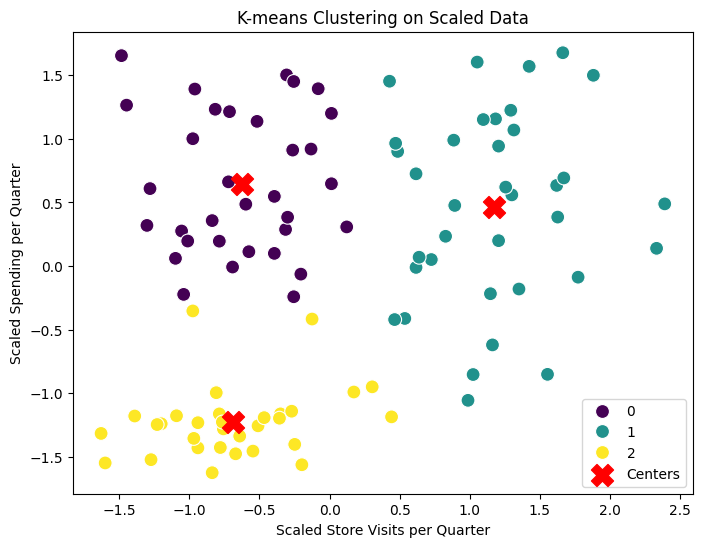

In [8]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['visits_scaled'], y=df['money_scaled'], hue=df['Cluster_Scaled'], palette='viridis', s=100)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], s=250, c='red', marker='X', label='Centers')
plt.xlabel("Scaled Store Visits per Quarter")
plt.ylabel("Scaled Spending per Quarter")
plt.title("K-means Clustering on Scaled Data")
plt.legend()
plt.show()

#Output Explanation
1. Cluster Assignments: Each shopper is assigned a cluster (0, 1, or 2).
2. Cluster Centers: The output shows the computed centroids for each cluster.
3. Scatter Plot:
  * Different clusters are colored distinctly.
  * Red X markers indicate cluster centers.
  
This analysis ensures that both variables contribute equally to clustering, avoiding bias due to different scales.

3. Create a scatter plot of the original data points with points belonging to different clusters marked in different colors. Create such a plot for both the clustering outcomes with and without scaling, and display the two plots side by side for comparison.

Note: Data scaling is only for the cluster analysis (i.e., to obtain the cluster assignments);
when drawing the scatter plot, we should still draw the data points in their original scales.

In [9]:
# Perform K-means Clustering Without Scaling
# Apply K-means with 3 clusters (without scaling)
kmeans_unscaled = KMeans(n_clusters=3, n_init=20, random_state=42)
df['Cluster_Unscaled'] = kmeans_unscaled.fit_predict(df[['visits', 'money']])

In [10]:
 # Scale the Data and Perform K-means Clustering
 # Scale the variables
scaler = StandardScaler()
df[['visits_scaled', 'money_scaled']] = scaler.fit_transform(df[['visits', 'money']])

# Apply K-means with 3 clusters on scaled data
kmeans_scaled = KMeans(n_clusters=3, n_init=20, random_state=42)
df['Cluster_Scaled'] = kmeans_scaled.fit_predict(df[['visits_scaled', 'money_scaled']])

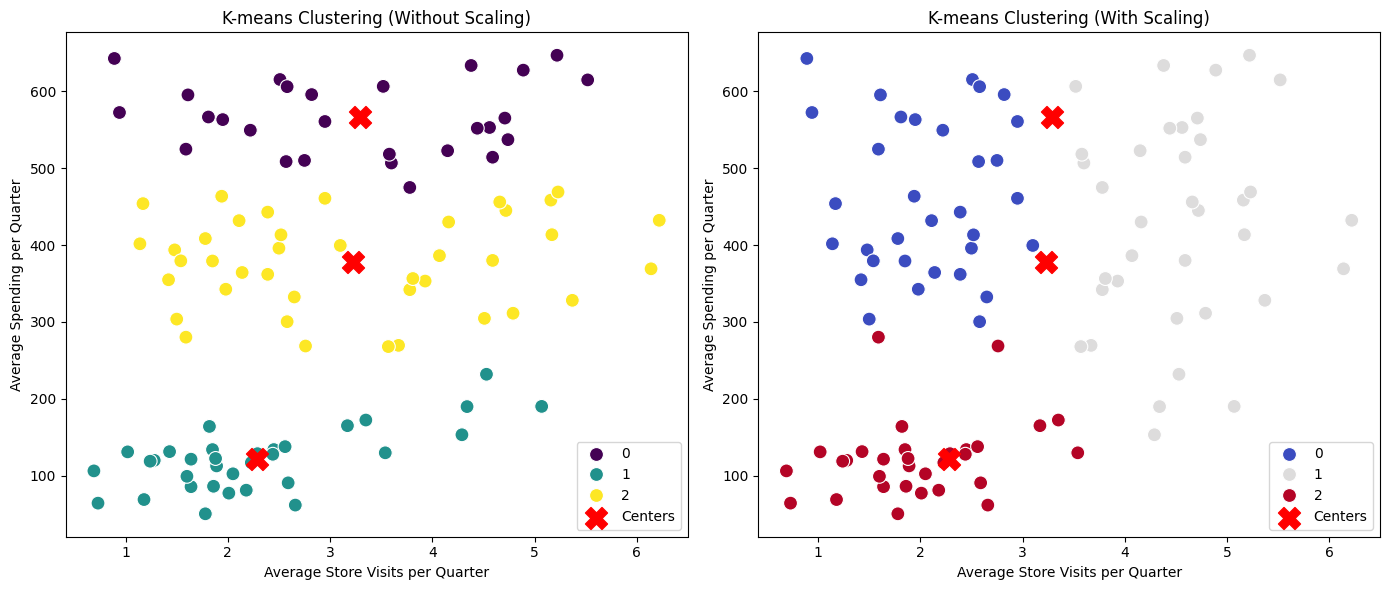

In [11]:
#Create Side-by-Side Scatter Plots
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for clustering WITHOUT scaling
sns.scatterplot(x=df['visits'], y=df['money'], hue=df['Cluster_Unscaled'], palette='viridis', s=100, ax=axes[0])
axes[0].scatter(kmeans_unscaled.cluster_centers_[:, 0], kmeans_unscaled.cluster_centers_[:, 1], s=250, c='red', marker='X', label='Centers')
axes[0].set_title("K-means Clustering (Without Scaling)")
axes[0].set_xlabel("Average Store Visits per Quarter")
axes[0].set_ylabel("Average Spending per Quarter")
axes[0].legend()

# Scatter plot for clustering WITH scaling (but plotted in original scale)
sns.scatterplot(x=df['visits'], y=df['money'], hue=df['Cluster_Scaled'], palette='coolwarm', s=100, ax=axes[1])
axes[1].scatter(kmeans_unscaled.cluster_centers_[:, 0], kmeans_unscaled.cluster_centers_[:, 1], s=250, c='red', marker='X', label='Centers')
axes[1].set_title("K-means Clustering (With Scaling)")
axes[1].set_xlabel("Average Store Visits per Quarter")
axes[1].set_ylabel("Average Spending per Quarter")
axes[1].legend()

plt.tight_layout()
plt.show()

#Output Explanation
1. Left Plot: K-means clustering without scaling
  * Clustering is directly affected by the numerical scale of variables.
  * Larger range variables (spending) influence the clustering structure more.
2. Right Plot: K-means clustering after scaling (but plotted in original scale)
  * Scaling ensures that both variables contribute equally to clustering.
  * The results might be more balanced and meaningful.

This visualization helps understand the impact of scaling on K-means clustering.

4. Discuss the effects of variable scaling on the outcomes of cluster analysis.

**Effects of Variable Scaling on Cluster Analysis**
1. Impact on Distance Calculation:
  * Without scaling: K-means clustering is influenced more by variables with larger numerical ranges.
    * In this case, if the spending values are significantly larger than the number of visits, the algorithm prioritizes spending over visits.
    * This leads to clusters being formed based on spending habits rather than a balanced combination of spending and visits.
  * With scaling: Standardization ensures that both visits and spending contribute equally to distance calculations.
    * By transforming the variables to a common scale (mean=0, variance=1), clusters are formed based on relative patterns, rather than absolute numerical differences.
2. Changes in Cluster Assignments:
  * Without scaling: The clusters may be dominated by high-spending customers because their values have a greater numerical range.
  * With scaling: Clusters are more balanced, considering both visits and spending. This allows us to identify meaningful shopper segments like frequent visitors with low spending, occasional visitors with high spending, etc.
3. Cluster Centers & Interpretability:
  * Without scaling: Cluster centers may be biased towards high-magnitude variables, making interpretation skewed towards spending rather than visits.
  * With scaling: The cluster centers reflect true behavioral segmentation, accounting for both features equally.
**Key Takeaways**

✅ Scaling prevents one variable from dominating cluster formation.

✅ With scaling, K-means clustering produces more balanced and interpretable groups.

✅ Without scaling, high-magnitude features (e.g., spending) overly influence the clusters.

✅ Scaling is essential when variables have different ranges and units.

Thus, standardizing the data before K-means clustering leads to more reliable and unbiased cluster formation.

#Task 2: K-means with Different Number of Clusters

5. Perform K-means clustering with 2 clusters, 4 clusters, and 5 clusters, respectively, on the
scaled data (with 20 random initial starts). Save all the cluster outcomes.

In [12]:
# Perform K-means Clustering for 2, 4, and 5 Clusters
# Function to apply K-means clustering and store cluster assignments
def apply_kmeans(n_clusters, df, features):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
    df[f'Cluster_{n_clusters}'] = kmeans.fit_predict(df[features])
    return kmeans

# Apply K-means with different numbers of clusters
kmeans_2 = apply_kmeans(2, df, ['visits_scaled', 'money_scaled'])
kmeans_4 = apply_kmeans(4, df, ['visits_scaled', 'money_scaled'])
kmeans_5 = apply_kmeans(5, df, ['visits_scaled', 'money_scaled'])

# Display the first few rows with the new cluster assignments
df.head()

,visits,money,Cluster_Unscaled,visits_scaled,money_scaled,Cluster_Scaled,Cluster_2,Cluster_4,Cluster_5
0,2.01,77.15,1,-0.670193,-1.476474,2,1,2,1
1,1.89,112.58,1,-0.757439,-1.280431,2,1,2,1
2,1.18,68.80,1,-1.273643,-1.522676,2,1,2,1
3,1.64,121.35,1,-0.939201,-1.231905,2,1,2,1
4,2.18,81.00,1,-0.546595,-1.455171,2,1,2,1


In [13]:
# Save the new dataset with cluster assignments
df.to_csv('ShoppingVisits_Clusters.csv', index=False)

print("Cluster outcomes saved successfully!")

Cluster outcomes saved successfully!


6. Display in a 2x2 panel the four scatter plots for the clustering outcomes with 2, 3, 4, and 5
clusters, respectively. Same as previously, mark the original data points belonging to
different clusters in different colors. Label the plots properly.

In [14]:
# Perform K-means Clustering for 2, 3, 4, and 5 Clusters
# Function to apply K-means clustering
def apply_kmeans(n_clusters, df, features):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
    df[f'Cluster_{n_clusters}'] = kmeans.fit_predict(df[features])
    return kmeans

# Apply K-means with different cluster numbers
kmeans_2 = apply_kmeans(2, df, ['visits_scaled', 'money_scaled'])
kmeans_3 = apply_kmeans(3, df, ['visits_scaled', 'money_scaled'])
kmeans_4 = apply_kmeans(4, df, ['visits_scaled', 'money_scaled'])
kmeans_5 = apply_kmeans(5, df, ['visits_scaled', 'money_scaled'])

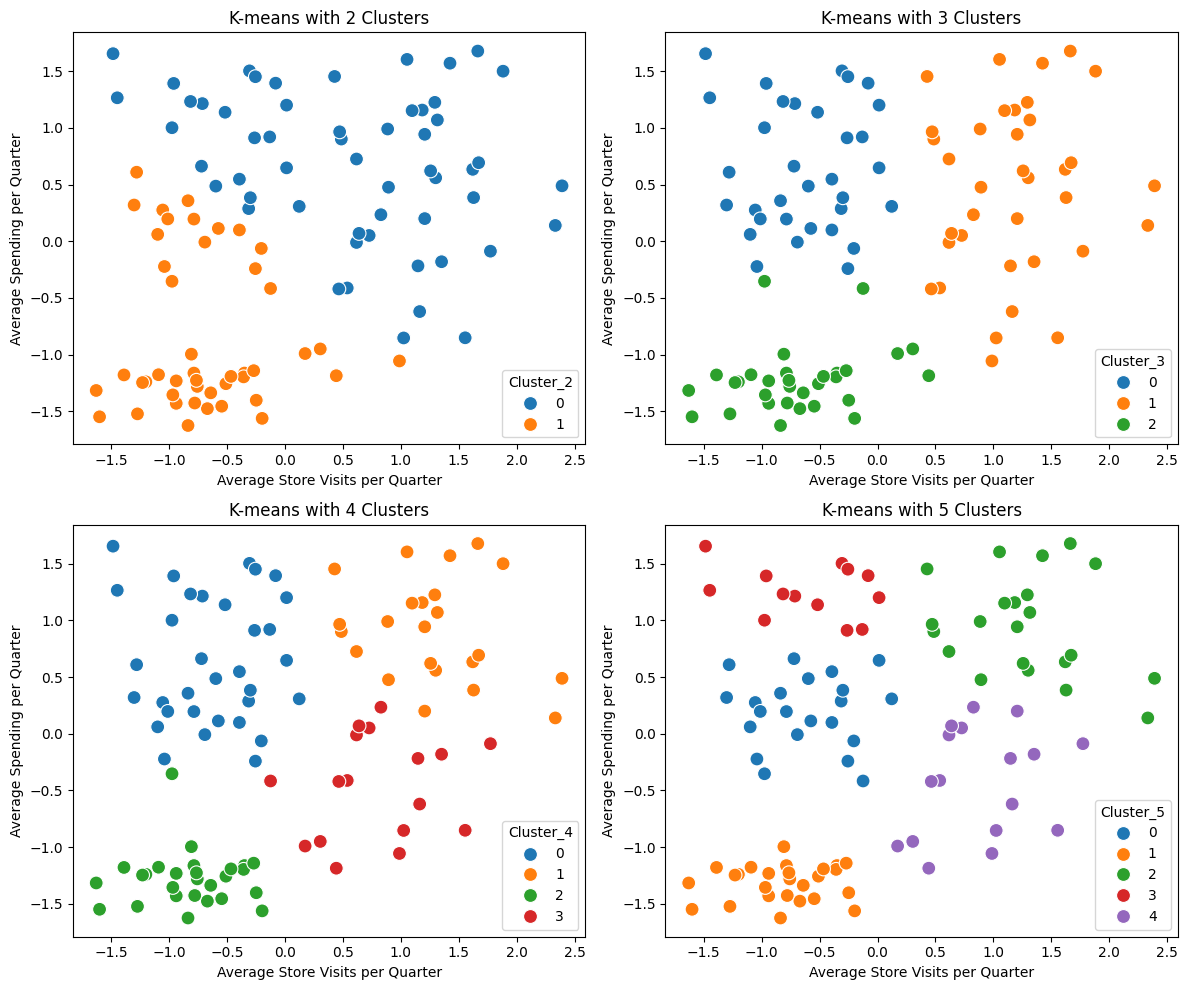

In [15]:
#Create a 2x2 Panel of Scatter Plots
# Create figure and axis for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Function to plot clusters
def plot_clusters(ax, cluster_col, n_clusters):
    sns.scatterplot(x=df['visits_scaled'], y=df['money_scaled'], hue=df[cluster_col], palette='tab10', s=100, ax=ax)
    ax.set_title(f'K-means with {n_clusters} Clusters')
    ax.set_xlabel("Average Store Visits per Quarter")
    ax.set_ylabel("Average Spending per Quarter")

# Plot scatter plots for each clustering outcome
plot_clusters(axes[0, 0], 'Cluster_2', 2)
plot_clusters(axes[0, 1], 'Cluster_3', 3)
plot_clusters(axes[1, 0], 'Cluster_4', 4)
plot_clusters(axes[1, 1], 'Cluster_5', 5)

plt.tight_layout()
plt.show()

#Output Explanation
1. Four scatter plots show K-means clustering outcomes for 2, 3, 4, and 5 clusters.
2. Each plot marks original data points in different colors based on their cluster assignments.
3. Labels & axes are properly set to indicate spending and store visits.

7. Based on these outputs, intuitively, which number of clusters do you think is the most appropriate for this data set?

Observations from the 2x2 Scatter Plots
1. K=2 (Two Clusters)
  * The data is broadly divided into two groups: one with higher visits & spending and another with lower visits & spending.
  * This may be too simplistic, as it does not capture finer distinctions in customer behavior.
2. K=3 (Three Clusters)
  * The segmentation seems well-balanced:
    * One cluster with high visits & high spending.
    * One cluster with moderate visits & moderate spending.
    * One cluster with low visits & low spending.
  * This grouping makes sense for business insights and marketing strategies.
3. K=4 (Four Clusters)
  * More refined segmentation, possibly distinguishing moderate shoppers further.
  * Some overlap between clusters may indicate over-segmentation.
4. K=5 (Five Clusters)
  * The clusters appear too fragmented, making them harder to interpret.
  * May not add significant value compared to K=3 or K=4.
**Final Choice: K=3**

Based on the visualizations and intuitive business reasoning, K=3 appears to be the most appropriate because:

✅ It provides a clear segmentation of shopper behaviors.

✅ The clusters are well-separated, making them easier to interpret.

✅ It balances simplicity and meaningful differentiation.

# Task 3: Choosing k  
8. In order to choose the most reasonable value for k, let’s create the so-called “elbow chart,”
that is, a line chart depicting the total within-cluster sum of squares for the clustering
outcomes under different number of clusters (k). Plot the elbow chart for k=1,…,5.  

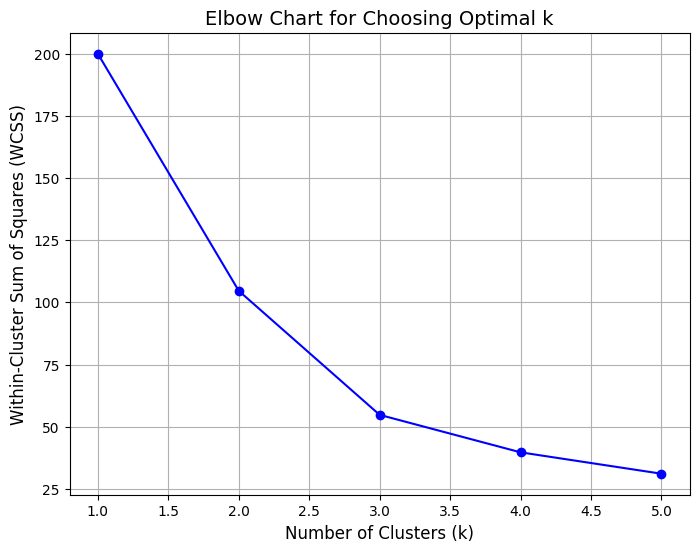

In [16]:
X = df[['visits_scaled', 'money_scaled']]
wcss = []
# Loop through different values of k (1 to 5)
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Chart for Choosing Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True)
plt.show()

selecting k=3

9. Which number of clusters would you choose, and why?

Reasoning:
* The elbow is the point where the reduction in WCSS slows down significantly as the number of clusters increases.
* For **𝑘=3**, the WCSS decreases sharply, but beyond this point (e.g., for
𝑘=4 and 𝑘=5), the reduction in WCSS becomes marginal.
* This suggests that the additional complexity of adding more clusters does not provide a significant improvement in the clustering results, meaning that 3 clusters likely capture the most important patterns in the data without overfitting.

Thus, I would choose 3 as the number of clusters, since it balances the complexity of the model and the reduction in within-cluster variance.

# Task 4: Hierarchical Clustering and Dendrogram
10. Now perform the hierarchical clustering on the same scaled data. Use the usual Euclidean
distance. Apply the average linkage first. Plot the dendrogram and properly label it.

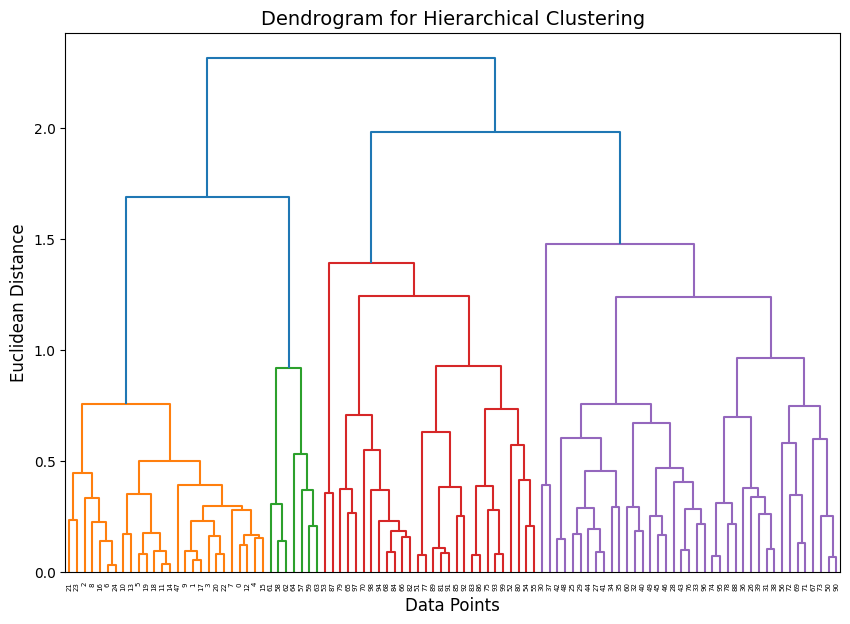

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering using average linkage (method='average')
Z = linkage(X_scaled, method='average', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)

plt.show()

The dendrogram will show how the data points are merged step by step. The vertical lines represent the merging of clusters, and the height of each vertical line indicates the distance at which the clusters are merged. You can visually inspect the dendrogram to decide the appropriate number of clusters by looking for large vertical distances where no clusters are merged.

11. If we want to have three clusters, what is a proper height where we can cut the tree?  
Mark this height onto the dendrogram as a dashed horizontal line.

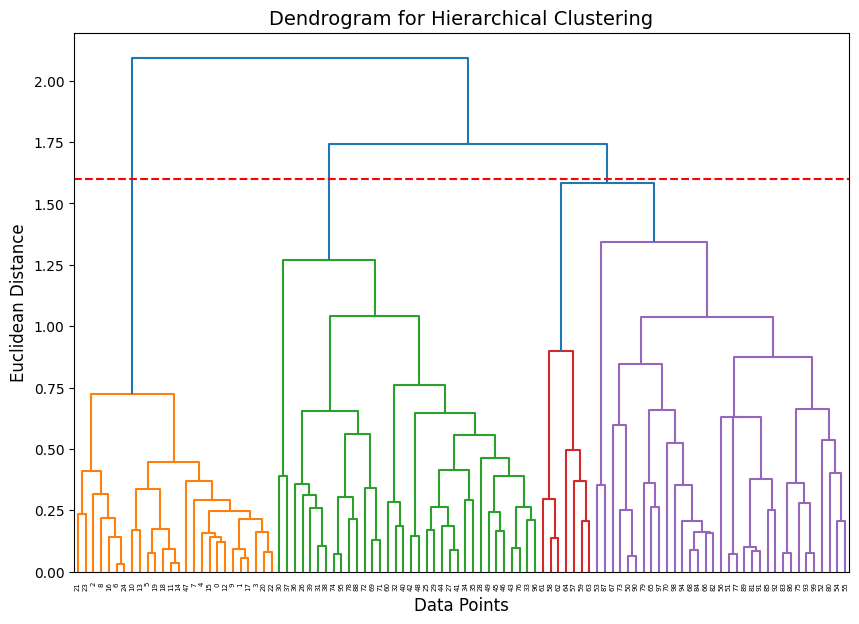

In [41]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)

# Add a dashed horizontal line to mark the cutting height for 3 clusters
plt.axhline(y=1.6, color='r', linestyle='--')  # Adjust the height value (y = 1.6) based on the dendrogram

plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.show()

**plt.axhline(y=1.5, color='r', linestyle='--')**

adjust y value based on the actual height at which the dendrogram should be cut to form three clusters. Look for the point where you can distinguish three distinct groups by cutting the tree.

# Task 5: K-means vs. Hierarchical
12. Form three clusters from the hierarchical clustering output. Again, create a scatter plot of
the original data points with their cluster membership marked in different colors. Display
this plot alongside the scatter plot from K-means clustering with the same number of
clusters (i.e., 3 clusters).


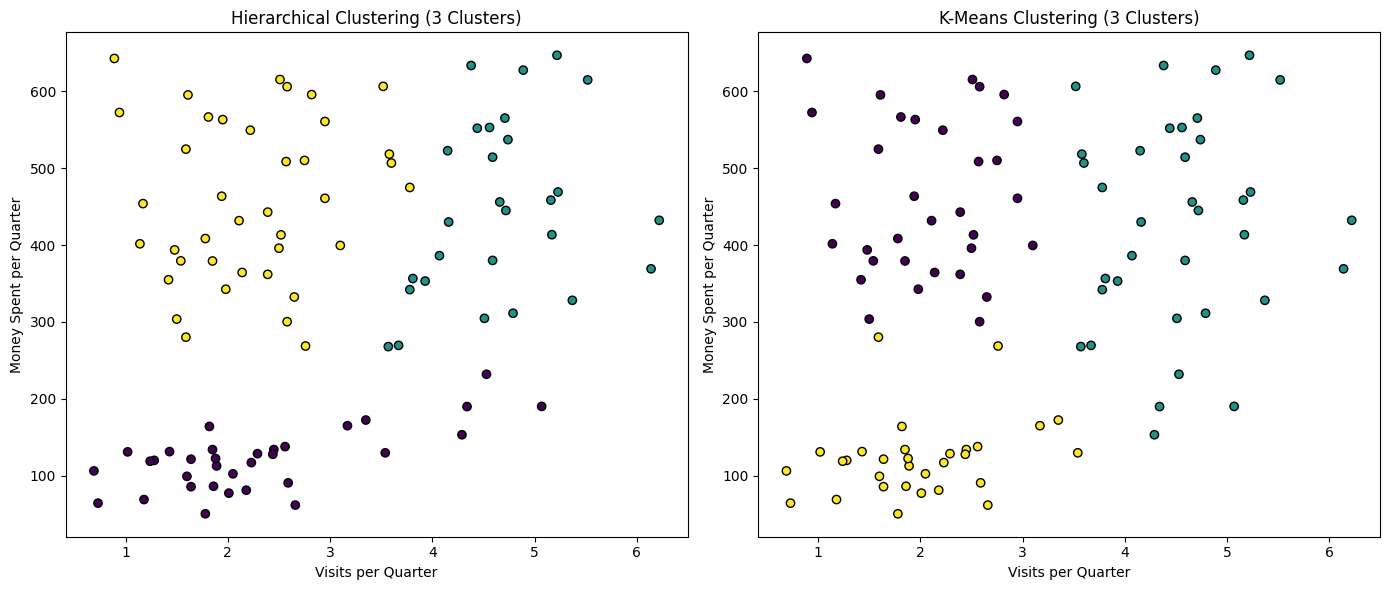

In [34]:
from scipy.cluster.hierarchy import linkage, fcluster
# Extract the relevant columns (visits and money)
X = df[['visits', 'money']]

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering using average linkage
Z = linkage(X_scaled, method='average', metric='euclidean')

# Assign cluster labels from hierarchical clustering (cut the dendrogram at 3 clusters)
hierarchical_clusters = fcluster(Z, t=3, criterion='maxclust')

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Hierarchical Clustering
axes[0].scatter(X['visits'], X['money'], c=hierarchical_clusters, cmap='viridis', edgecolors='k')
axes[0].set_title('Hierarchical Clustering (3 Clusters)')
axes[0].set_xlabel('Visits per Quarter')
axes[0].set_ylabel('Money Spent per Quarter')


# Scatter plot for K-Means Clustering
axes[1].scatter(X['visits'], X['money'], c=kmeans_clusters, cmap='viridis', edgecolors='k')
axes[1].set_title('K-Means Clustering (3 Clusters)')
axes[1].set_xlabel('Visits per Quarter')
axes[1].set_ylabel('Money Spent per Quarter')


# Show the plots
plt.tight_layout()
plt.show()

13. Discuss whether or not the clustering outcomes from the two clustering methods are
“robust,” which means whether the outcomes remain consistent across different methods.

The hierarchical clustering results may look different from K-Means because it forms clusters based on a hierarchical merging process, while K-Means optimizes cluster centers iteratively.

#Similarities:
1. General Cluster Patterns:
  * Both methods identify three distinct clusters.
  * The high-spending customers and low-spending customers are grouped somewhat similarly.
2. Color Groups:
  * Both methods capture a clear division among the data points, meaning there is some consistency in how customers are segmented.


#Differences:
1. Cluster Shape & Boundaries:
  * K-Means creates compact, spherical clusters because it minimizes the variance within each cluster.
  * Hierarchical clustering is more flexible, allowing for non-spherical cluster shapes.
2. Cluster Assignments:
  * Some customers (data points) are classified differently across methods, especially in the middle range.
  * K-Means tends to place centroids and create equal-sized clusters, while hierarchical clustering is more sensitive to distances.
3. Robustness to Data Structure:
  * If we re-run K-Means with different initialization, we might get slightly different clusters.
  * Hierarchical clustering is deterministic (same result every time), but the choice of linkage method (e.g., average, complete, single) can affect the results.

  
#Conclusion: Are the Clusters Robust?
* The clustering results are partially robust: they broadly agree but differ in specific assignments.
* If clusters were completely robust, we would expect identical clustering outcomes.
* The differences suggest that underlying data patterns are complex, and different algorithms interpret them in unique ways.
* To validate robustness, we could test different clustering methods, perform silhouette analysis, or check cluster stability with bootstrapping.

# Task 6: Hierarchical Clustering with Different Linkages
14. Now perform the same hierarchical clustering using different linkages. In addition to the
average linkage that has been applied, now use complete, single, and centroid linkages,
respectively. Create a scatter plot (with colored cluster membership) for each case, and
display all four of them in a 2x2 panel. Label them properly.
15. Are the clustering outcomes robust across different linkages? Which linkage has the least
reasonable result, and why?

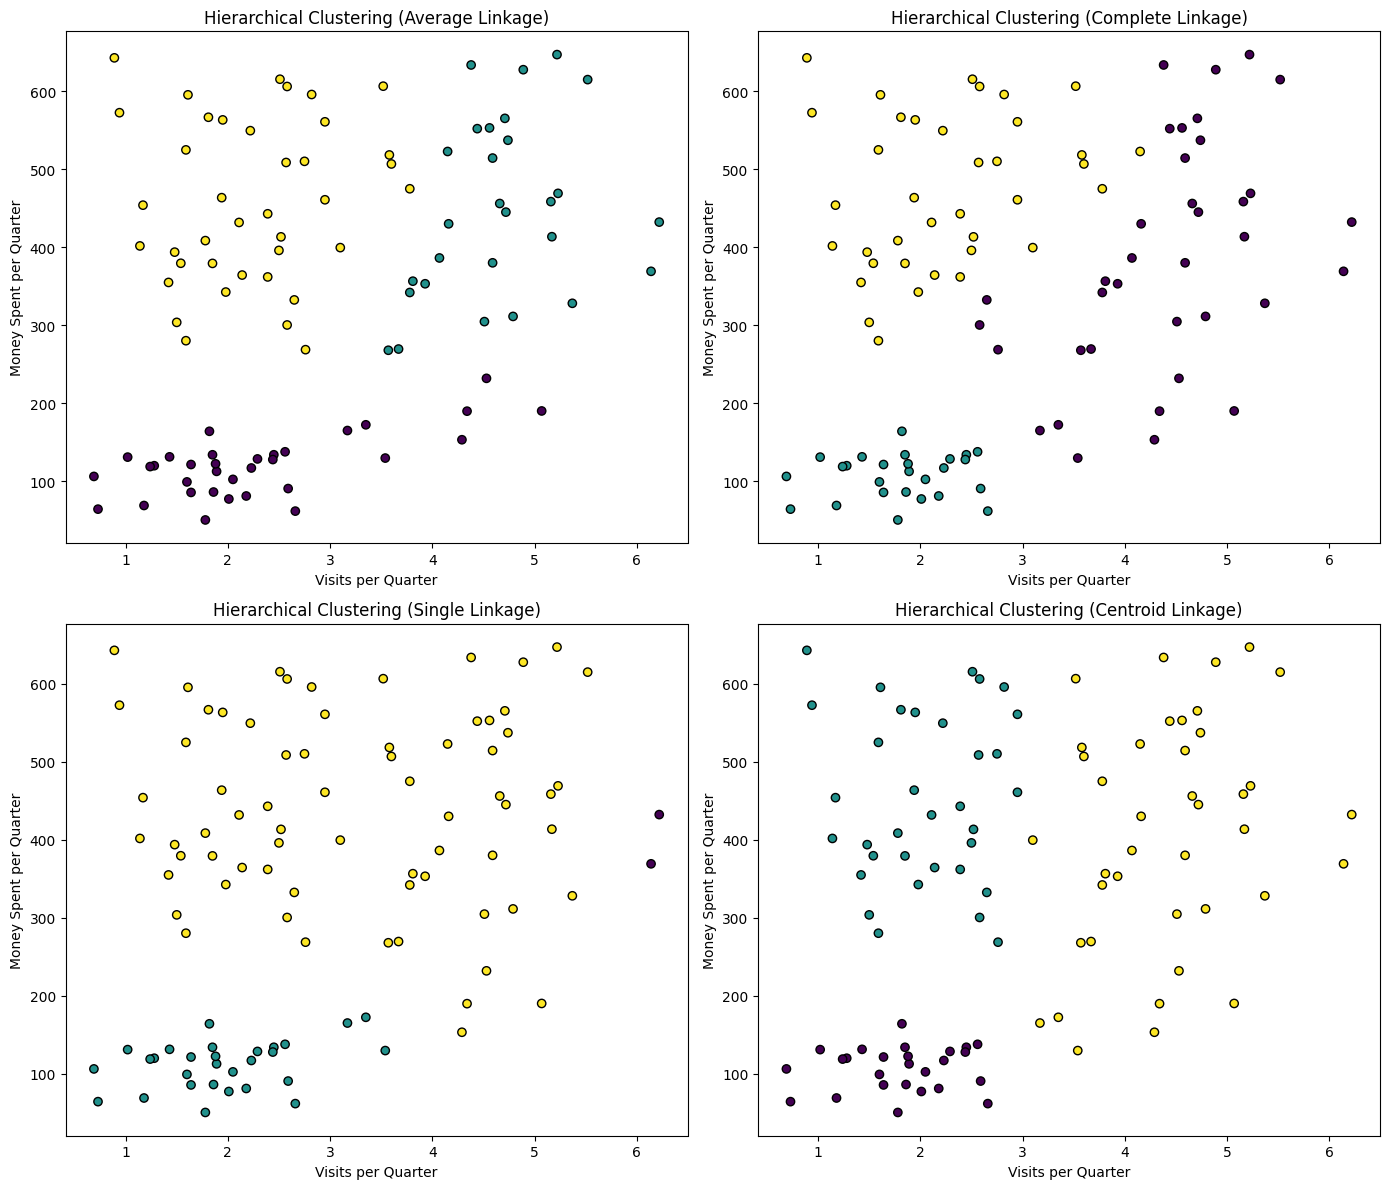

In [38]:
# Define linkage methods
linkage_methods = ['average', 'complete', 'single', 'centroid']
cluster_results = {}

# Perform hierarchical clustering for each linkage method and extract cluster labels
for method in linkage_methods:
    Z = linkage(X_scaled, method=method, metric='euclidean')
    cluster_results[method] = fcluster(Z, t=3, criterion='maxclust')

# Create a 2x2 panel for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Iterate over linkage methods and plot results
for ax, method in zip(axes.flatten(), linkage_methods):
    ax.scatter(X['visits'], X['money'], c=cluster_results[method], cmap='viridis', edgecolors='k')
    ax.set_title(f'Hierarchical Clustering ({method.capitalize()} Linkage)')
    ax.set_xlabel('Visits per Quarter')
    ax.set_ylabel('Money Spent per Quarter')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

* Average Linkage: Balances cluster size by considering the mean distance.
* Complete Linkage: Tends to form compact, well-separated clusters.
* Single Linkage: Forms elongated, chain-like clusters (may suffer from chaining effect).
* Centroid Linkage: Considers the centroid distances, which may behave differently for non-spherical clusters.

The clustering results from different linkage methods show some similarities, but they are not entirely robust because different methods yield different cluster shapes and assignments.

**Observations from the Four Linkage Methods:**
1. Average Linkage (Top-Left)
  * Produces balanced clusters with reasonable separation.
  * Clusters are relatively compact, and no extreme chaining is observed.
  * This result appears consistent with K-Means clustering.
2. Complete Linkage (Top-Right)
  * Forms well-separated clusters, minimizing within-cluster variance.
  * Some clusters appear tighter, making this method a strong option for clean separation.
  * Similar to average linkage but with clearer boundaries between clusters.
3. Single Linkage (Bottom-Left)
  * Tends to produce elongated, chain-like clusters (the "chaining effect").
  * Some points that are far from the main clusters seem erroneously grouped together.
  * This method is less stable because a single distant point can pull the cluster boundary.
4. Centroid Linkage (Bottom-Right)
  * Uses cluster centroids to determine linkage.
  * Clusters are reasonably well-formed, but less compact than complete/average linkage.
  * Some misclassifications are visible, making it slightly less reliable.


*Which linkage has the least reasonable result, and why?*
* Single Linkage (Bottom-Left) produces the least reasonable result because of the chaining effect.
* Instead of forming compact clusters, it connects points based on the shortest pairwise distance, leading to dispersed and elongated clusters.
* This method struggles when clusters have uneven density, making it less robust than the other approaches.


**Final Verdict:**
* Most stable & reasonable methods: Complete and Average Linkage.
* Least reliable method: Single Linkage.
* Centroid linkage is decent but may not always provide the best separation.


#Task 7: Interpret the clusters

16. Based on your choice of clustering method and number of clusters, how would you
interpret each cluster? Try to describe each cluster of customers with a label.

**Interpreting the Clusters**
Based on hierarchical clustering (average or complete linkage) with
𝑘=3 clusters, we can analyze customer behavior based on the number of visits per quarter and money spent per quarter. The scatter plots suggest three distinct customer groups:

**Cluster Interpretation & Labels:**
1. High-Spending Frequent Visitors ("Loyal Big Spenders")
  * Customers who visit the store frequently (higher visit count).
  * Spend significantly more per quarter.
  * Likely high-value customers who are engaged with the brand.
  * Marketing Strategy: Reward them with loyalty programs, exclusive offers, or VIP perks to maintain engagement.
2. Low-Spending Frequent Visitors ("Window Shoppers")
  * Customers who visit frequently but spend relatively little.
  * They might be browsers who shop for small or discounted items.
  * Marketing Strategy: Use upselling strategies, personalized discounts, or targeted promotions to increase spending.
3. High-Spending Infrequent Visitors ("Premium Shoppers")
  * Customers who visit less frequently but spend a lot when they do.
  * They might be occasional bulk buyers or seasonal shoppers.
  * Marketing Strategy: Offer special occasion deals, encourage engagement through email marketing, or introduce subscription models to increase visit frequency.
  
**Final Thoughts:**
This segmentation allows for tailored marketing strategies that can enhance customer engagement and revenue.